In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
!pip install plotnine

In [3]:
from plotnine import *
import plotnine

In [4]:
!pip install kmodes

In [5]:
from kmodes.kprototypes import KPrototypes

In [6]:
data = pd.read_csv("data/enriched_data.csv", low_memory = False)

In [7]:
data.drop(['city','locality'],axis=1,inplace=True)

In [8]:
data.head()

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,Pricepm2
0,2,2.0,0,0,20000.0,1450.0,0,2.0,13.793103
1,2,1.0,1,4,7350.0,210.0,1,1.0,35.000000
2,2,3.0,0,0,22000.0,1900.0,2,3.0,11.578947
3,2,2.0,0,2,13000.0,1285.0,1,2.0,10.116732
4,2,2.0,0,2,18000.0,1600.0,0,2.0,11.250000


In [9]:
data_array = data.values

In [10]:
data_array[:, 4] = data_array[:, 4].astype(float)
data_array[:, 5] = data_array[:, 5].astype(float)
data_array[:, 6] = data_array[:, 6].astype(float)

In [11]:
data_array

array([[ 2.        ,  2.        ,  0.        , ...,  0.        ,
         2.        , 13.79310345],
       [ 2.        ,  1.        ,  1.        , ...,  1.        ,
         1.        , 35.        ],
       [ 2.        ,  3.        ,  0.        , ...,  2.        ,
         3.        , 11.57894737],
       ...,
       [ 2.        ,  1.        ,  0.        , ...,  1.        ,
         1.        , 21.85089974],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         2.        , 24.62686567],
       [ 0.        ,  2.        ,  0.        , ...,  2.        ,
         2.        , 15.        ]])

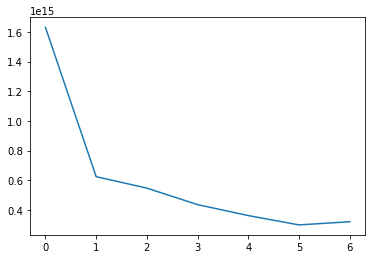

In [34]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, n_jobs=-1, init='huang', max_iter=2, n_init=1, random_state=122)
    kproto.fit_predict(data_array, categorical = [0, 1, 2, 3, 6, 7])
    cost.append(kproto.cost_)

plt.plot(cost)

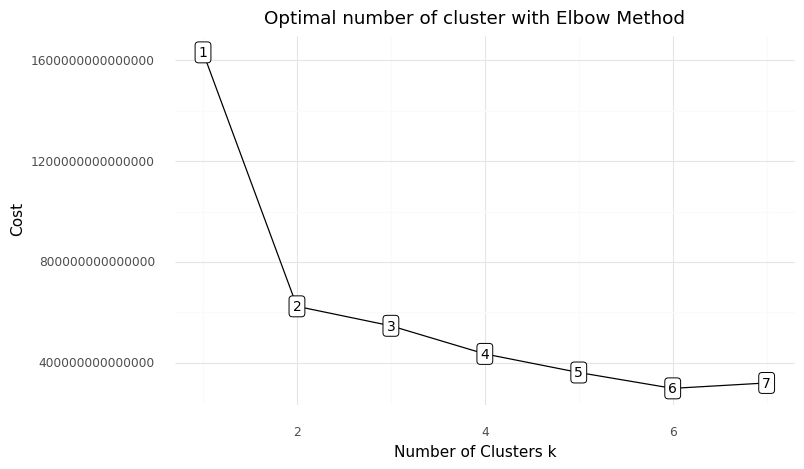

<ggplot: (180257548249)>

In [38]:
df_cost = pd.DataFrame({'Cluster':range(1, 8), 'Cost':cost})
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [12]:
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=5)
clusters = kproto.fit_predict(data_array, categorical=[0, 1, 2, 3, 6, 7])
label = kproto.labels_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/5, moves: 92975, ncost: 577842789807848.9
Run: 1, iteration: 2/5, moves: 47200, ncost: 533128729648053.94
Run: 1, iteration: 3/5, moves: 23480, ncost: 493183811749859.9
Run: 1, iteration: 4/5, moves: 11098, ncost: 464240777474720.1
Run: 1, iteration: 5/5, moves: 6025, ncost: 445662014380554.2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/5, moves: 106187, ncost: 573436613389238.9
Run: 2, iteration: 2/5, moves: 43464, ncost: 528979992212003.06
Run: 2, iteration: 3/5, moves: 22523, ncost: 486899589690728.7
Run: 2, iteration: 4/5, moves: 10503, ncost: 462312501234602.0
Run: 2, iteration: 5/5, moves: 5756, ncost: 441309586879917.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/5, moves: 5008, ncost: 464952640112006.25
Run: 3, iteration: 2/5, moves: 4781, ncost: 443668927859897.0
Run:

In [13]:
kproto.cluster_centroids_

array([[6.95955250e+05, 6.21411704e+03, 1.16893904e+02, 0.00000000e+00,
        4.00000000e+00, 0.00000000e+00, 5.00000000e+00, 2.00000000e+00,
        4.00000000e+00],
       [2.61983135e+05, 3.77229891e+03, 7.90241235e+01, 0.00000000e+00,
        4.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.00000000e+00,
        4.00000000e+00],
       [2.64991349e+04, 1.08363903e+03, 2.59319851e+01, 0.00000000e+00,
        2.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        2.00000000e+00]])

In [14]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [15]:
data["Cluster"]=cluster_dict

In [16]:
data

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,Pricepm2,Cluster
0,2,2.0,0,0,20000.0,1450.0,0,2.0,13.793103,2
1,2,1.0,1,4,7350.0,210.0,1,1.0,35.000000,2
2,2,3.0,0,0,22000.0,1900.0,2,3.0,11.578947,2
3,2,2.0,0,2,13000.0,1285.0,1,2.0,10.116732,2
4,2,2.0,0,2,18000.0,1600.0,0,2.0,11.250000,2
...,...,...,...,...,...,...,...,...,...,...
193006,2,1.0,0,0,13250.0,650.0,1,1.0,20.384615,2
193007,2,1.0,1,4,7000.0,350.0,2,1.0,20.000000,2
193008,2,1.0,0,0,8500.0,389.0,1,1.0,21.850900,2
193009,0,1.0,0,0,16500.0,670.0,1,2.0,24.626866,2


In [17]:
data[data["Cluster"]==0].head()

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,Pricepm2,Cluster
29739,0,5.0,0,2,500000.0,9500.0,1,5.0,52.631579,0
29740,0,8.0,0,2,500000.0,10000.0,0,9.0,50.000000,0
30234,0,4.0,0,0,800000.0,7000.0,1,5.0,114.285714,0
31370,2,10.0,0,1,900000.0,9500.0,0,4.0,94.736842,0
33994,2,2.0,0,2,500000.0,1500.0,2,1.0,333.333333,0


In [18]:
data[data["Cluster"]==1].head()

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,Pricepm2,Cluster
2252,0,4.0,0,0,150000.0,3500.0,0,4.0,42.857143,1
2253,0,4.0,0,0,150000.0,3500.0,0,4.0,42.857143,1
2279,0,5.0,0,0,150000.0,3000.0,0,5.0,50.000000,1
2280,0,5.0,0,0,150000.0,3000.0,0,5.0,50.000000,1
2394,0,4.0,0,0,150000.0,4500.0,0,4.0,33.333333,1


In [19]:
data[data["Cluster"]==2].head()

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,Pricepm2,Cluster
0,2,2.0,0,0,20000.0,1450.0,0,2.0,13.793103,2
1,2,1.0,1,4,7350.0,210.0,1,1.0,35.000000,2
2,2,3.0,0,0,22000.0,1900.0,2,3.0,11.578947,2
3,2,2.0,0,2,13000.0,1285.0,1,2.0,10.116732,2
4,2,2.0,0,2,18000.0,1600.0,0,2.0,11.250000,2


In [20]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(data_array)
principal_comp

array([[-24334.04917466,   -394.54870799],
       [-36994.23030828,    736.93853619],
       [-22330.25781961,   -827.35329551],
       ...,
       [-35842.73741732,    567.6785333 ],
       [-27840.61839288,    355.4400463 ],
       [-32339.33724583,    186.69622328]])

In [21]:
pca_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
pca_df

,pca1,pca2
0,-24334.049175,-394.548708
1,-36994.230308,736.938536
2,-22330.257820,-827.353296
3,-31335.208801,-289.721896
4,-26332.687274,-561.737602
...,...,...
193006,-31090.670980,347.479650
193007,-37343.017378,593.771410
193008,-35842.737417,567.678533
193009,-27840.618393,355.440046


In [22]:
pca_df = pd.concat([pca_df,pd.DataFrame({'Cluster':label})], axis=1)
pca_df

,pca1,pca2,Cluster
0,-24334.049175,-394.548708,2
1,-36994.230308,736.938536,2
2,-22330.257820,-827.353296,2
3,-31335.208801,-289.721896,2
4,-26332.687274,-561.737602,2
...,...,...,...
193006,-31090.670980,347.479650,2
193007,-37343.017378,593.771410,2
193008,-35842.737417,567.678533,2
193009,-27840.618393,355.440046,2


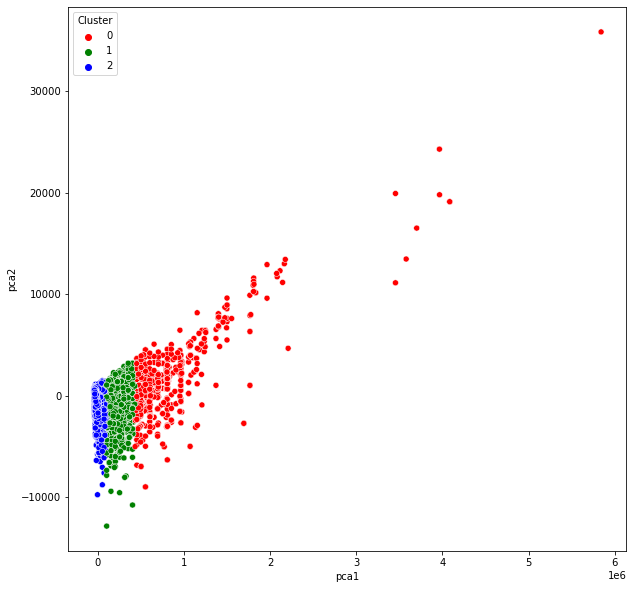

In [23]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='Cluster', data=pca_df, palette=['red','green','blue'])
plt.show()

In [24]:
cluster_0 = data[data["Cluster"]==0]
cluster_1 = data[data["Cluster"]==1]
cluster_2 = data[data["Cluster"]==2]

## Cluster 0(red)

In [25]:
cluster_0.head()

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,Pricepm2,Cluster
29739,0,5.0,0,2,500000.0,9500.0,1,5.0,52.631579,0
29740,0,8.0,0,2,500000.0,10000.0,0,9.0,50.000000,0
30234,0,4.0,0,0,800000.0,7000.0,1,5.0,114.285714,0
31370,2,10.0,0,1,900000.0,9500.0,0,4.0,94.736842,0
33994,2,2.0,0,2,500000.0,1500.0,2,1.0,333.333333,0


In [26]:
cluster_0.describe()

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,Pricepm2,Cluster
count,1627.000000,1627.000000,1627.0,1627.000000,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.0
mean,0.008605,4.759680,0.0,2.486171,7.131573e+05,6246.459127,1.795329,4.706208,119.340377,0.0
std,0.126159,1.706841,0.0,1.851239,3.664243e+05,1991.186522,0.483965,1.635170,50.640020,0.0
min,0.000000,2.000000,0.0,0.000000,4.800000e+05,1500.000000,0.000000,1.000000,40.000000,0.0
25%,0.000000,4.000000,0.0,1.000000,5.250000e+05,5363.000000,2.000000,4.000000,89.200273,0.0
50%,0.000000,4.000000,0.0,2.000000,5.680000e+05,5622.000000,2.000000,4.000000,100.940319,0.0
75%,0.000000,5.000000,0.0,5.000000,8.410000e+05,6521.000000,2.000000,5.000000,134.483999,0.0
max,2.000000,15.000000,0.0,5.000000,5.885000e+06,19800.000000,2.000000,16.000000,400.000000,0.0


D:\Anaconda_installation\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
D:\Anaconda_installation\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
D:\Anaconda_installation\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
D:\Anaconda_installation\lib\site-packages\

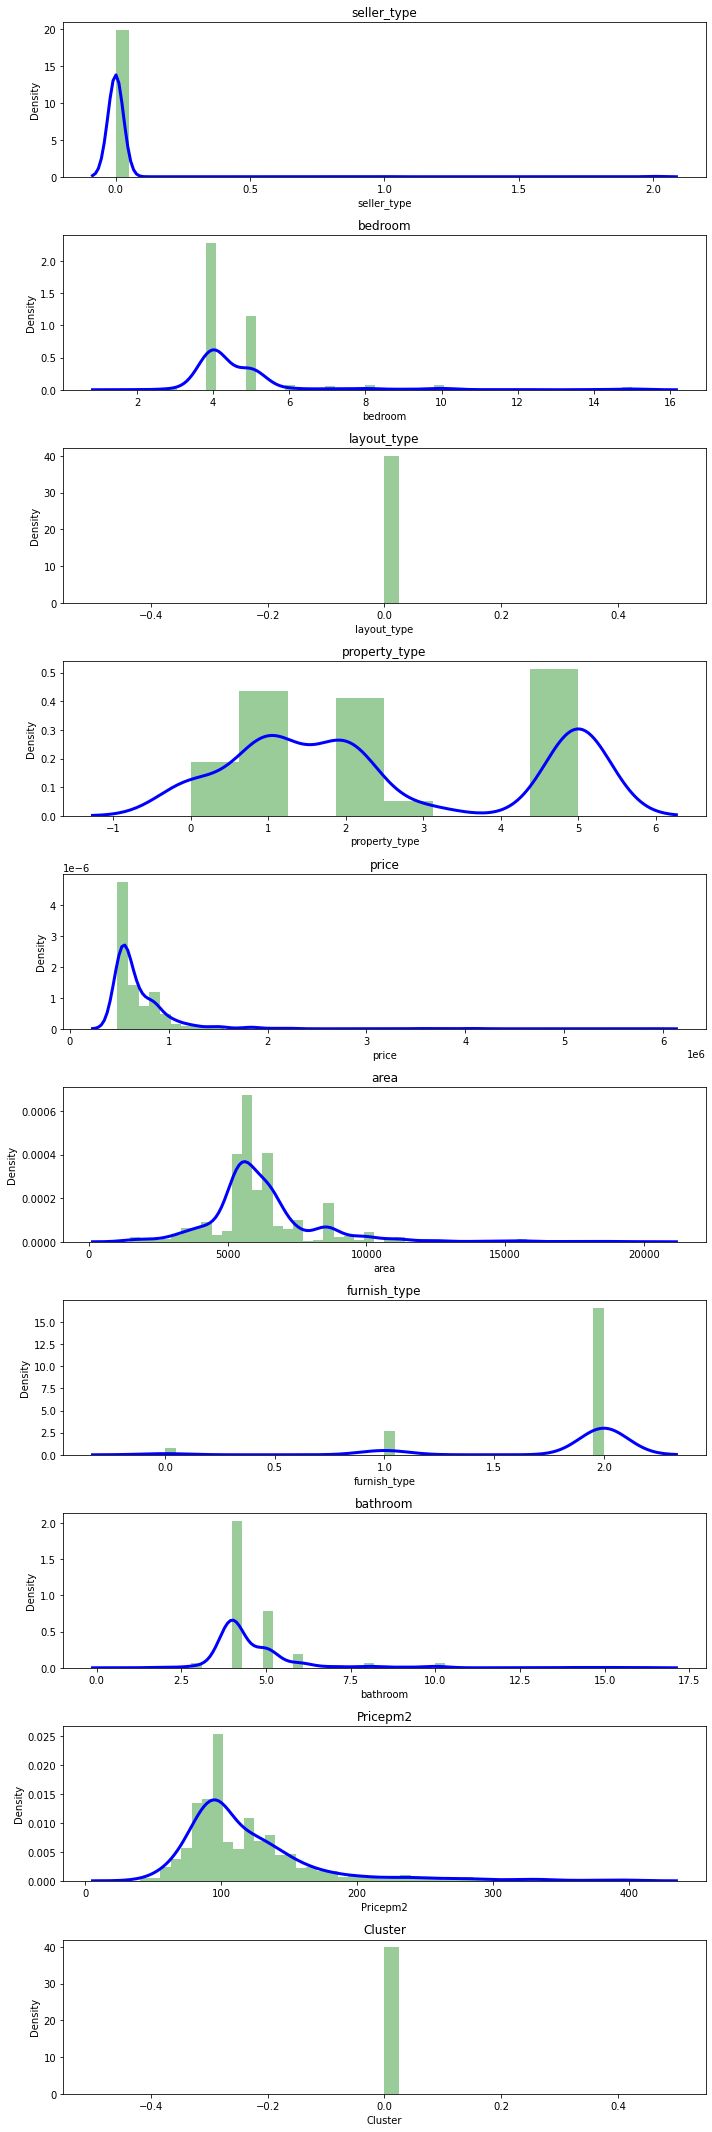

In [27]:
plt.figure(figsize=(10,50))
for i in range(len(cluster_0.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(cluster_0[cluster_0.columns[i]],kde_kws={"color":"b", "lw":3,"label":"KDE"}, hist_kws={"color":"g"})
    plt.title(cluster_0.columns[i]) 
    
plt.tight_layout()

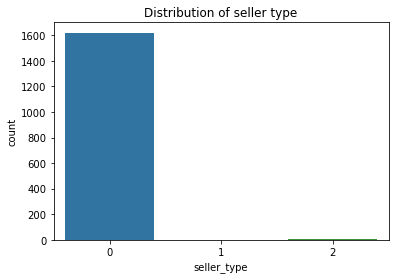

In [45]:
sns.countplot(x='seller_type', data=cluster_0);
plt.title('Distribution of seller type');

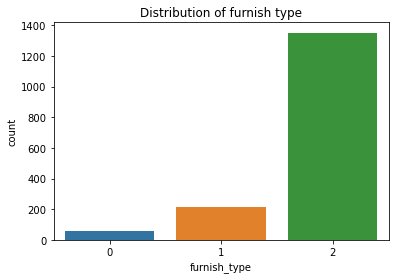

In [44]:
sns.countplot(x='furnish_type', data=cluster_0);
plt.title('Distribution of furnish type');

### This cluster can be targeted to the people who considers buying from agent and wants property with unfurnished BHK. 

## Cluster 1(Green)

In [28]:
cluster_1.head()

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,Pricepm2,Cluster
2252,0,4.0,0,0,150000.0,3500.0,0,4.0,42.857143,1
2253,0,4.0,0,0,150000.0,3500.0,0,4.0,42.857143,1
2279,0,5.0,0,0,150000.0,3000.0,0,5.0,50.000000,1
2280,0,5.0,0,0,150000.0,3000.0,0,5.0,50.000000,1
2394,0,4.0,0,0,150000.0,4500.0,0,4.0,33.333333,1


In [29]:
cluster_1.describe()

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,Pricepm2,Cluster
count,9712.000000,9712.000000,9712.000000,9712.000000,9712.000000,9712.000000,9712.000000,9712.000000,9712.000000,9712.0
mean,0.039539,3.656610,0.000412,1.087932,265150.947282,3798.439250,1.424835,3.703460,79.285990,1.0
std,0.276572,0.842064,0.020291,1.337917,84233.822825,1665.717146,0.748811,0.932594,32.422654,0.0
min,0.000000,1.000000,0.000000,0.000000,145000.000000,575.000000,0.000000,1.000000,10.000000,1.0
25%,0.000000,3.000000,0.000000,0.000000,200000.000000,2552.000000,1.000000,3.000000,57.866488,1.0
50%,0.000000,4.000000,0.000000,1.000000,250000.000000,3011.000000,2.000000,4.000000,73.330901,1.0
75%,0.000000,4.000000,0.000000,1.000000,325000.000000,5400.000000,2.000000,4.000000,94.339623,1.0
max,2.000000,15.000000,1.000000,5.000000,475000.000000,15500.000000,2.000000,19.000000,400.000000,1.0


D:\Anaconda_installation\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
D:\Anaconda_installation\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
D:\Anaconda_installation\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
D:\Anaconda_installation\lib\site-packages\

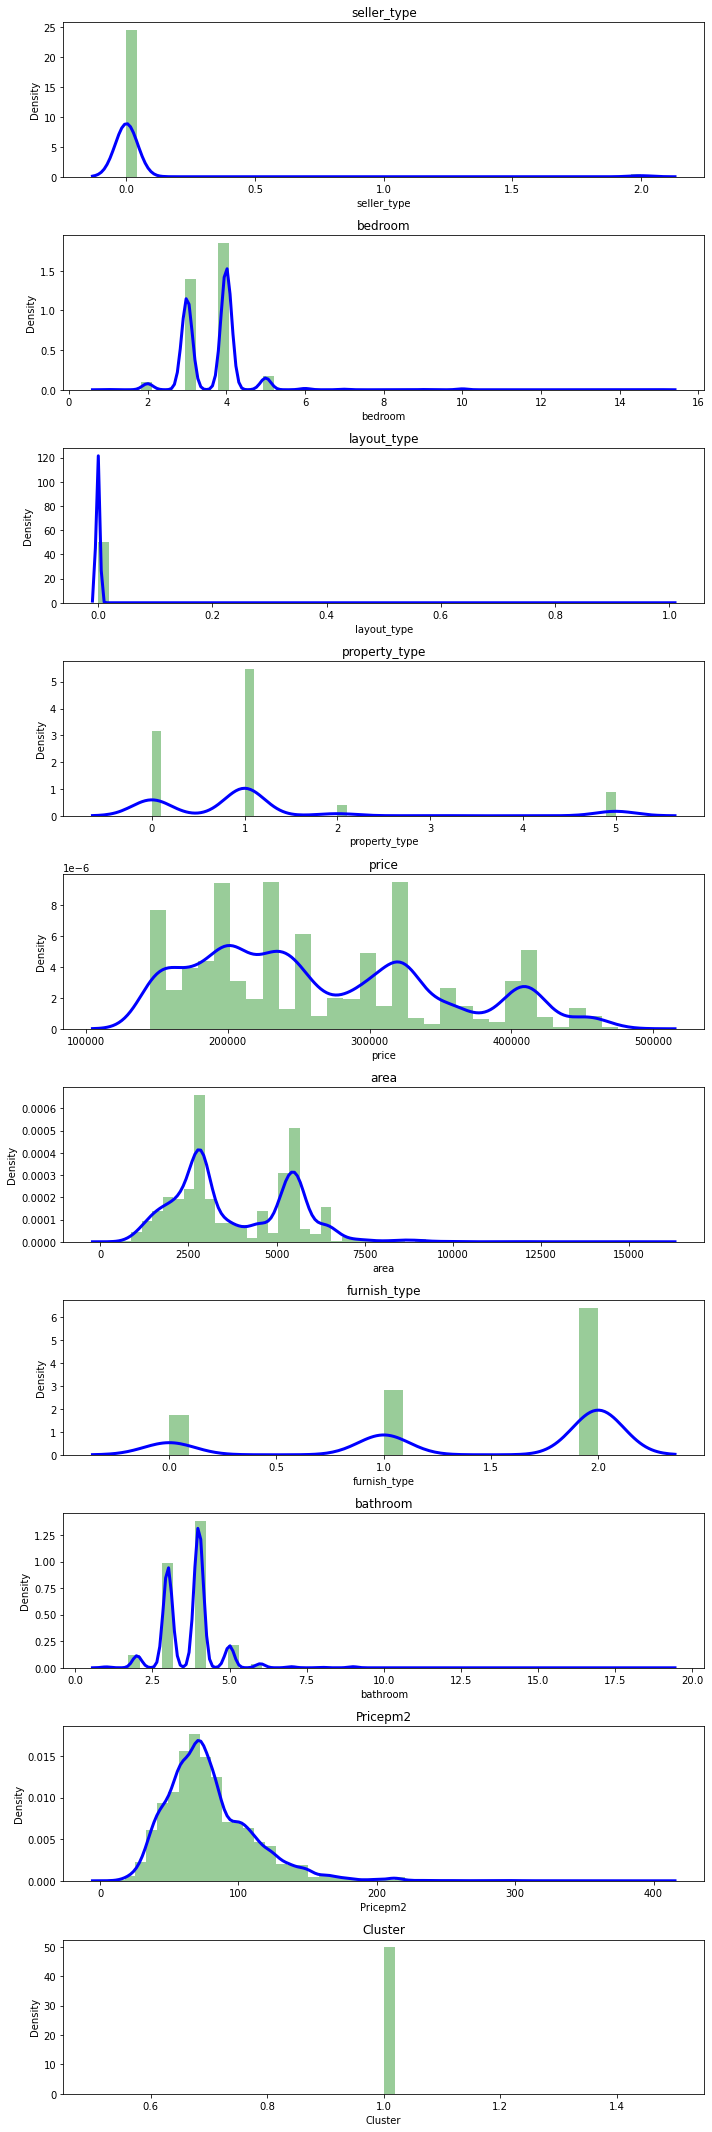

In [30]:
plt.figure(figsize=(10,50))
for i in range(len(cluster_1.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(cluster_1[cluster_1.columns[i]],kde_kws={"color":"b", "lw":3,"label":"KDE"}, hist_kws={"color":"g"})
    plt.title(cluster_1.columns[i]) 
    
plt.tight_layout()

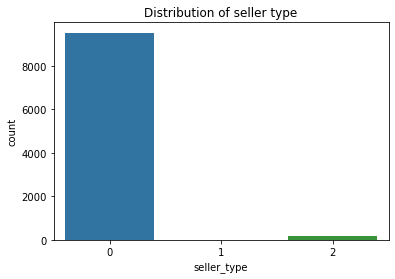

In [46]:
sns.countplot(x='seller_type', data=cluster_1);
plt.title('Distribution of seller type');

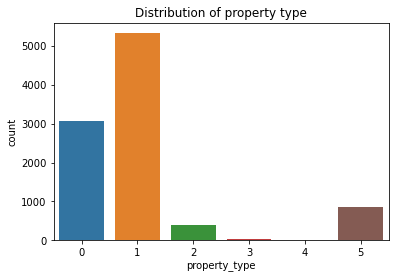

In [47]:
sns.countplot(x='property_type', data=cluster_1);
plt.title('Distribution of property type');

### This category can be targeted to the people who wants to buy the property from agents and the owner themselves where they need Apartment and Independent floor type of property.

## Cluster 2(Blue)

In [31]:
cluster_2.head()

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,Pricepm2,Cluster
0,2,2.0,0,0,20000.0,1450.0,0,2.0,13.793103,2
1,2,1.0,1,4,7350.0,210.0,1,1.0,35.000000,2
2,2,3.0,0,0,22000.0,1900.0,2,3.0,11.578947,2
3,2,2.0,0,2,13000.0,1285.0,1,2.0,10.116732,2
4,2,2.0,0,2,18000.0,1600.0,0,2.0,11.250000,2


In [32]:
cluster_2.describe()

,seller_type,bedroom,layout_type,property_type,price,area,furnish_type,bathroom,Pricepm2,Cluster
count,181672.000000,181672.000000,181672.000000,181672.000000,181672.000000,181672.000000,181672.000000,181672.000000,181672.000000,181672.0
mean,0.431415,1.973502,0.050965,0.503341,26542.265192,1084.532245,1.080843,1.948319,25.940421,2.0
std,0.818151,0.836840,0.219928,1.089355,21738.184645,612.888696,0.693962,0.799003,24.333104,0.0
min,0.000000,1.000000,0.000000,0.000000,1200.000000,3.000000,0.000000,1.000000,4.000000,2.0
25%,0.000000,1.000000,0.000000,0.000000,12500.000000,650.000000,1.000000,1.000000,14.545455,2.0
50%,0.000000,2.000000,0.000000,0.000000,20000.000000,1000.000000,1.000000,2.000000,20.000000,2.0
75%,0.000000,3.000000,0.000000,0.000000,32000.000000,1300.000000,2.000000,2.000000,31.111111,2.0
max,2.000000,12.000000,1.000000,5.000000,144000.000000,11000.000000,2.000000,12.000000,7050.000000,2.0


D:\Anaconda_installation\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
D:\Anaconda_installation\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
D:\Anaconda_installation\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
D:\Anaconda_installation\lib\site-packages\

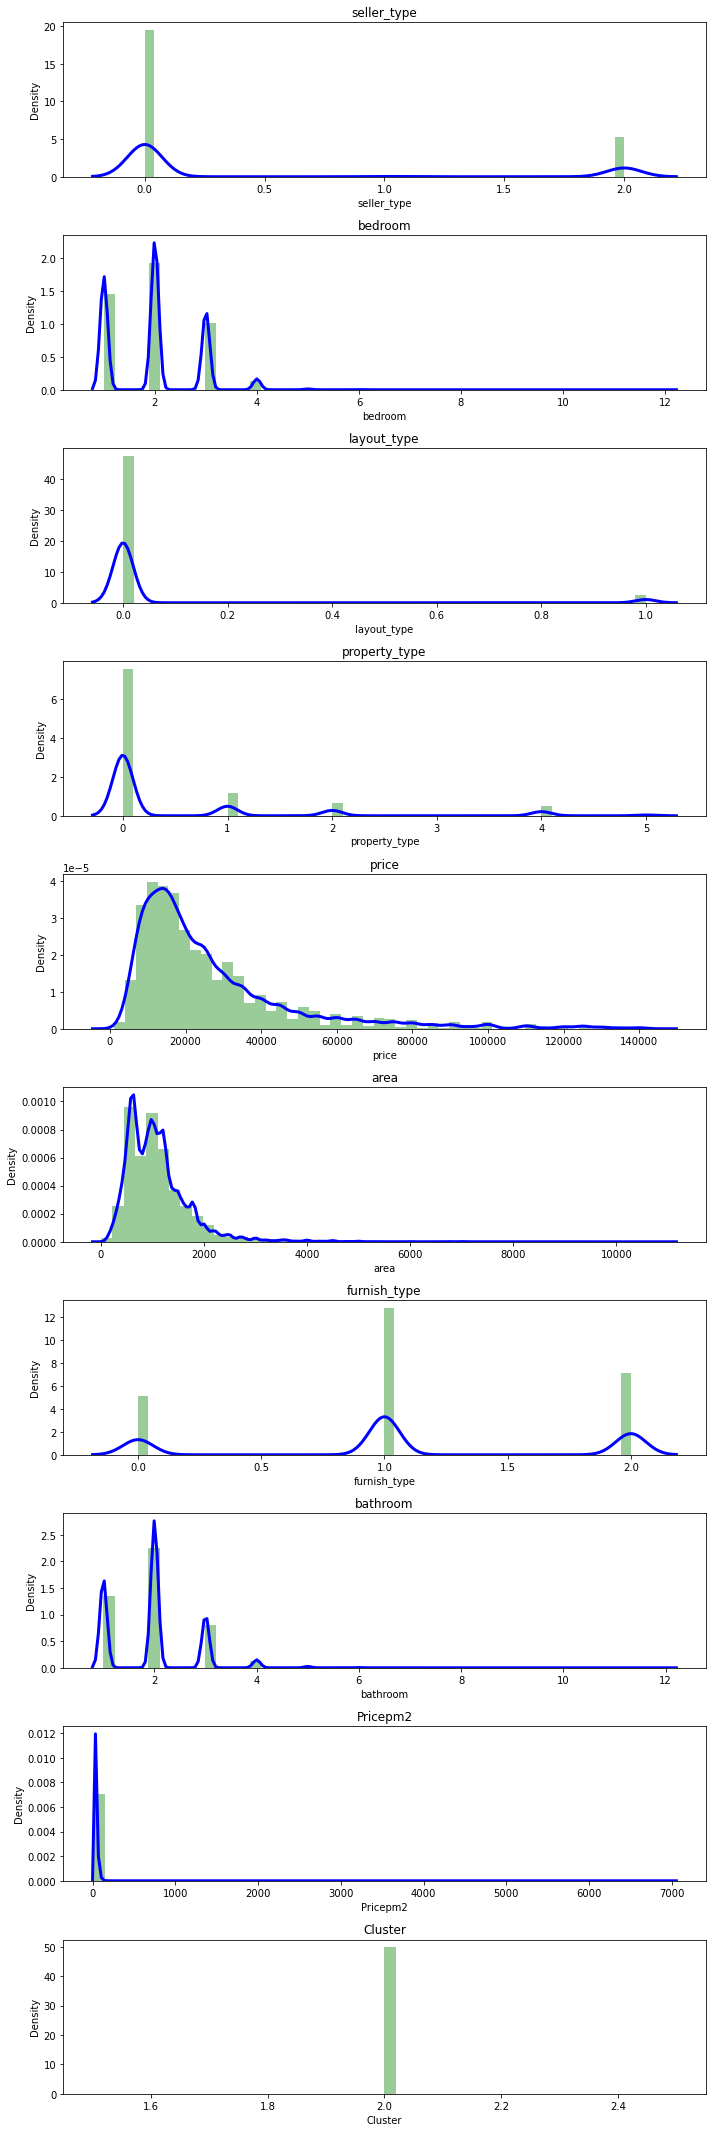

In [33]:
plt.figure(figsize=(10,50))
for i in range(len(cluster_2.columns)):
    plt.subplot(17,1,i+1)
    sns.distplot(cluster_2[cluster_2.columns[i]],kde_kws={"color":"b", "lw":3,"label":"KDE"}, hist_kws={"color":"g"})
    plt.title(cluster_2.columns[i]) 
    
plt.tight_layout()

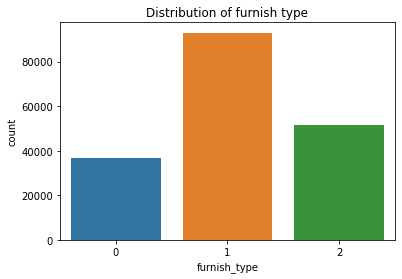

In [51]:
sns.countplot(x='furnish_type', data=cluster_2);
plt.title('Distribution of furnish type');

### This category can be targeted to the people whose need semi-furnished type property with less number of bathrooms and bedrooms.